# Cross-Country Comparison Approach

## 1. Load Cleaned Data
- Benin: data/benin_clean.csv
- Sierra Leone: data/sierra_leone_clean.csv
- Togo: data/togo_clean.csv

## 2. Metric Comparison
- Boxplots of GHI, DNI, DHI for all three countries (one plot per metric, colored by country).
- Summary table comparing mean, median, and standard deviation of GHI, DNI, DHI.

## 3. Statistical Testing (optional)
- Run one-way ANOVA or Kruskal-Wallis on GHI to check for significant differences.
- Note p-values in notebook (for final submission).

## 4. Key Observations (Markdown)
- Bullet points of what stands out.
  - Example:
    - Country X has highest median GHI.
    - Country Y has most variable DNI.
    - Togo has most stable DHI.

## 5. Visual Summary
- Small bar chart ranking countries by average GHI.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

benin = pd.read_csv('../data/cleaned/benin-malanville_clean.csv')
sierra = pd.read_csv('../data/cleaned/sierraleone-bumbuna_clean.csv')
togo = pd.read_csv('../data/cleaned/togo_clean.csv')

In [2]:
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierra, togo])

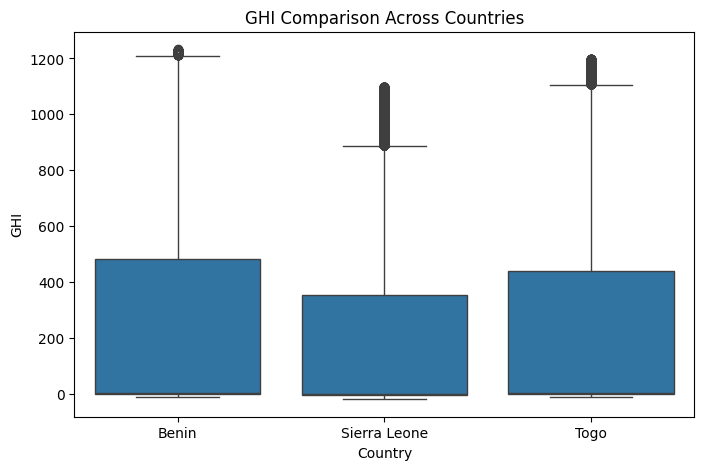

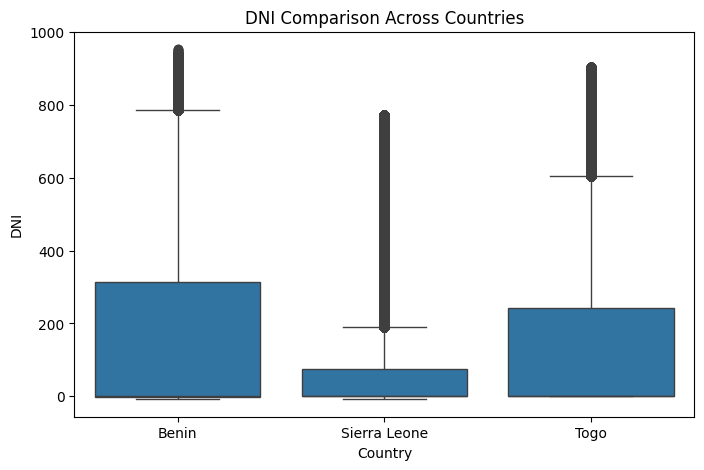

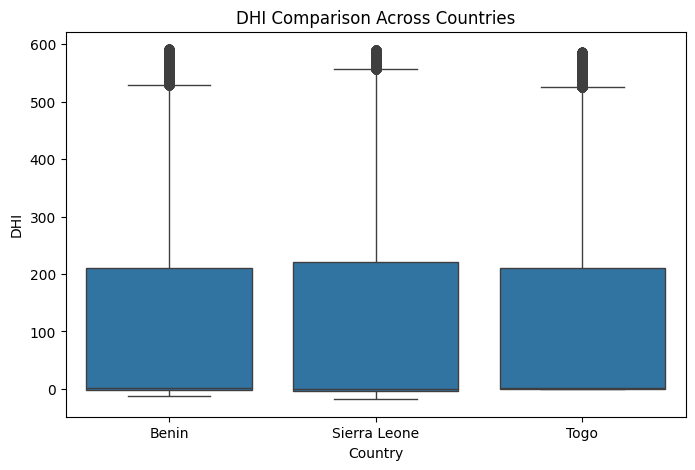

In [3]:
for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f"{metric} Comparison Across Countries")
    plt.show()

In [4]:
summary = df_all.groupby('Country')[['GHI','DNI','DHI']].agg(['mean','median','std'])
display(summary)

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.342811    1.8  330.868308  167.187516   -0.1  261.710501   
Sierra Leone  196.441990    0.3  291.235290  104.527217   -0.1  201.696328   
Togo          229.831936    2.1  321.643747  149.368966    0.0  248.554496   

                     DHI                     
                    mean median         std  
Country                                      
Benin         110.906983    1.6  152.916844  
Sierra Leone  110.109541   -0.1  154.170508  
Togo          112.408673    2.5  151.292938

In [5]:
f_val, p_val = stats.f_oneway(
    benin['GHI'].dropna(),
    sierra['GHI'].dropna(),
    togo['GHI'].dropna()
)
print("ANOVA test on GHI: p-value =", p_val)

ANOVA test on GHI: p-value = 0.0


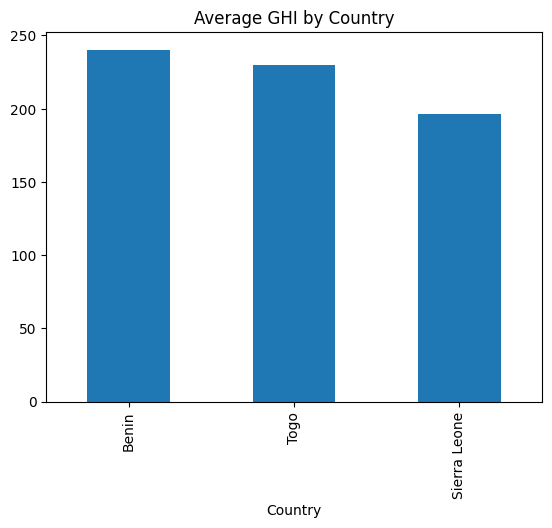

In [6]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', title='Average GHI by Country')
plt.show()

## SUMMARY
*Benin shows the highest mean GHI.

*Sierra Leone exhibits the highest variability in solar radiation.

*Togo shows consistent moderate potential.